In [1]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
from sklearn.neural_network import MLPClassifier
import time
#from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
#data = np.loadtxt("C:/Users/wwang75/Documents/CS/CS412/HW/HW2/data.csv")
data = np.loadtxt("/Users/wangfei/Documents/Courses/CS/CS412/HW/HW1/data.csv")
np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
        
def ExtractFeat(dataset,label):
    X = []   ##mean
    Y = []   ##std
    colors = []
    for index in range(len(dataset)):
        X.append(np.mean(dataset[index]))
        Y.append(np.std(dataset[index]))  
        if(label[index]=="1.0"):
            colors.append("b")
        else:
            colors.append("r")
    return [X, Y, colors];

##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+
            1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;
##normalize two features
###training features
Xnorm = normalize(ExtractFeat(trainFeatures,trainDigits)[0])
Ynorm = normalize(ExtractFeat(trainFeatures,trainDigits)[1])
Xnorm = np.asarray(Xnorm)
Ynorm = np.asarray(Ynorm)
simpleTrain = np.column_stack((Xnorm,Ynorm))
###testing features
Xnorm_test = normalize(ExtractFeat(testFeatures,testDigits)[0])
Ynorm_test = normalize(ExtractFeat(testFeatures,testDigits)[1])
Xnorm_test = np.asarray(Xnorm_test)
Ynorm_test = np.asarray(Ynorm_test)
simpleTest = np.column_stack((Xnorm_test,Ynorm_test))

xPred = []
yPred = []
for xP in range(-100,100):
    xP = xP/100
    for yP in range(-100,100):
        yP = yP/100
        xPred.append(xP)
        yPred.append(yP)

coordinate = list(zip(xPred,yPred))

def pred(model):
    preds = model.predict(coordinate)
    cPred = []
    for i in range(len(coordinate)):
        if(preds[i] == "1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
    return cPred;            

img_path = '/Users/wangfei/Documents/Courses/CS/CS412/HW/HW3/figures/'
#define plot function: for plotting decision boundary figures and CV_error figures 
def plot(grid1,grid2,plotNum,fileName,plotType,model,
         subtitle,ylimL,ylimU,xlab,ylab):   
    fig = mp.figure()
    if(plotNum==1):
        mp.title(fileName)
        if(plotType==1):
            mp.scatter(Xnorm, Ynorm, c=colors, s=3)
            mp.scatter(xPred, yPred, s=3, c=pred(model),alpha=.2)
        elif(plotType==2):
            mp.errorbar(c, model[0], marker='s', yerr=model[1],fmt='o',
                        markersize=2, capsize=1.5, elinewidth=1)
            mp.xscale('log')
        else:
            print('Plot Type not defined.')
        mp.ylim(ylimL,ylimU)
        mp.xlabel(xlab)
        mp.ylabel(ylab)
        mp.savefig(img_path + fileName, dpi = 300)
    else:
        for i in range(1,(plotNum+1)):
            ax = fig.add_subplot(grid1,grid2,i)
            if(plotType==1):
                ax.scatter(Xnorm, Ynorm, c=colors, s=3)
                ax.scatter(xPred, yPred, s=3, c=pred(model[i-1]),alpha=.04)
            elif(plotType==2):
                ax.errorbar(c, model[i-1][0], marker='s', yerr=model[i-1][1],fmt='o',
                        markersize=2, capsize=1.5, elinewidth=1)
                ax.set_xscale('log')
            else:
                print('Plot Type not defined.')
            ax.set_title(subtitle[i-1])
            ax.set_ylim(ylimL,ylimU)
            ax.set_xlabel(xlab)
            ax.set_ylabel(ylab)
            mp.subplots_adjust(top=0.92, bottom=0.12, left=0.11, right=0.94, 
                               hspace=0.60, wspace=0.45)
            mp.savefig(img_path + fileName, dpi = 300)
    return show();       

In [17]:
#NumbHidLayer = Number of hidden layers; NumbNodes = number of nodes/layer
#y = true labels, X = design matrix, data
#CV errors 
def cv_err_NN(NumbHidLayer,NumbNodes,X,y,cv=10,learningrate=0.001,earlystop = False):
    err_bar = []
    err_mean = []
    runtime = []
    for i in range(0, len(NumbHidLayer)):
        start_time = time.time()
        for j in range(0, len(NumbNodes)):
            NN = MLPClassifier(hidden_layer_sizes=(NumbNodes[j],NumbHidLayer[i]),activation = "relu",
                               max_iter=10000,alpha=0,epsilon=0.001,solver = "adam",
                               learning_rate_init=learningrate,early_stopping=earlystop)
            NN_fit = NN.fit(X,y)
            acc = cross_val_score(NN, X, y, cv=10)
            runtime.append(time.time() - start_time)
            err = 1 - acc
            err_mean.append(err.mean())
            err_bar.append(1.96 * err.std())
#             print('Hidden Layer = '+ repr(NumbHidLayer[i]) + ' Nodes per Layer = ' + 
#                   repr(NumbNodes[j]) + ': CV_err = ' + repr(err.mean()) + 
#                   ' and Error_bar = ' + repr(1.96*err.std()))
    return np.array([err_mean, err_bar,np.multiply(runtime,1000)])

In [3]:
cvErrorOld = cv_err_NN([1,2,5,10],[2,5,10,50,100],simpleTrain,trainDigits)
cvErrorOld
# array([[1.85094086e-01, 1.79045699e-01, 2.08534946e-01, 1.34375000e-01,
#         7.09341398e-02, 1.11404570e-01, 1.61760753e-01, 4.20430108e-02,
#         3.22580645e-03, 6.98588710e-02, 1.43158602e-01, 3.54905914e-02,
#         1.62432796e-02, 6.45161290e-03, 3.22580645e-03, 8.72110215e-02,
#         2.58198925e-02, 1.63440860e-02, 6.45161290e-03, 6.45161290e-03],
#        [2.95302803e-01, 2.61053801e-01, 2.97215585e-01, 3.10406740e-01,
#         2.62961035e-01, 2.37377049e-01, 2.79270952e-01, 1.85501758e-01,
#         1.89677419e-02, 2.58883504e-01, 2.78072384e-01, 7.18153616e-02,
#         4.32255819e-02, 2.52903226e-02, 1.89677419e-02, 2.34974023e-01,
#         4.79074574e-02, 4.33638700e-02, 2.52903226e-02, 2.52903226e-02],
#        [1.13211250e+04, 1.88550322e+04, 2.75967860e+04, 3.79106820e+04,
#         5.32653382e+04, 9.69889474e+03, 1.78222311e+04, 3.11327109e+04,
#         4.36247277e+04, 5.58709178e+04, 9.27538800e+03, 2.17990239e+04,
#         3.39435349e+04, 4.43565919e+04, 5.67064559e+04, 9.45899105e+03,
#         2.08835638e+04, 3.11254900e+04, 4.10187690e+04, 5.12829340e+04]])

array([[1.85094086e-01, 1.79045699e-01, 2.08534946e-01, 1.34375000e-01,
        7.09341398e-02, 1.11404570e-01, 1.61760753e-01, 4.20430108e-02,
        3.22580645e-03, 6.98588710e-02, 1.43158602e-01, 3.54905914e-02,
        1.62432796e-02, 6.45161290e-03, 3.22580645e-03, 8.72110215e-02,
        2.58198925e-02, 1.63440860e-02, 6.45161290e-03, 6.45161290e-03],
       [2.95302803e-01, 2.61053801e-01, 2.97215585e-01, 3.10406740e-01,
        2.62961035e-01, 2.37377049e-01, 2.79270952e-01, 1.85501758e-01,
        1.89677419e-02, 2.58883504e-01, 2.78072384e-01, 7.18153616e-02,
        4.32255819e-02, 2.52903226e-02, 1.89677419e-02, 2.34974023e-01,
        4.79074574e-02, 4.33638700e-02, 2.52903226e-02, 2.52903226e-02],
       [1.29444611e+04, 1.92835450e+04, 2.80785410e+04, 3.81778002e+04,
        5.30545001e+04, 9.50132418e+03, 1.90215101e+04, 3.22484400e+04,
        4.42696981e+04, 5.67999952e+04, 9.30070710e+03, 2.18227351e+04,
        3.37934179e+04, 4.56994181e+04, 6.34173429e+04, 9.9310

In [4]:
#get the lowest upper bound of CV_error and runtime
def opt(x1,x2,x3):
    return [np.argmin(np.add(x1,x2)), np.multiply(x3,1000)]
    
x1 = cvErrorOld[0]
x2 = cvErrorOld[1]
np.argmin(np.add(x1, x2))
x3 = cvErrorOld[2]

opt(x1,x2,x3)

# [8, array([11321125.03051758, 18855032.20558167, 27596786.02218628,
#         37910681.96296692, 53265338.18244934,  9698894.739151  ,
#         17822231.05430603, 31132710.9336853 , 43624727.72598267,
#         55870917.79708862,  9275388.00239563, 21799023.86665344,
#         33943534.85107422, 44356591.93992615, 56706455.94596863,
#          9458991.05072021, 20883563.75694275, 31125489.95018005,
#         41018769.02580261, 51282933.95042419])]

[8, array([12944461.10725403, 19283545.01724243, 28078541.04042053,
        38177800.17852783, 53054500.10299683,  9501324.17678833,
        19021510.12420654, 32248440.02723694, 44269698.14300537,
        56799995.1839447 ,  9300707.1018219 , 21822735.07118225,
        33793417.93060303, 45699418.06793213, 63417342.90122986,
         9931066.98989868, 21618577.003479  , 32590502.0236969 ,
        42401728.15322876, 52425523.04267883])]

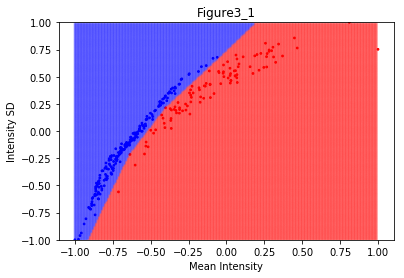

In [5]:
NN_opt = MLPClassifier(hidden_layer_sizes=(50,2),activation = "relu", epsilon=0.001, 
                       max_iter=10000,alpha=0, solver = "adam").fit(simpleTrain,trainDigits)
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure3_1',plotType=1,model=NN_opt,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')

# For your optimum model, try increasing and decreasing the learning rate from the default (0.001). Discuss the tradeoff here between runtime and accuracy?

In [21]:
learnPara = np.logspace(-6,3,num=10,endpoint=True)
learnTime = []
learnErrorMean = [] #CV error Mean
learnErrorSD = []   #CV error 1.96*SD
for index in range(0,10):
    learnTime.append(cv_err_NN([2],[50],simpleTrain,trainDigits,learningrate=learnPara[index])[2])
    learnErrorMean.append((cv_err_NN([2],[50],simpleTrain,trainDigits,learningrate=learnPara[index])[0]))
    learnErrorSD.append((cv_err_NN([2],[50],simpleTrain,trainDigits,learningrate=learnPara[index])[1]))
learnErrorMean, learnErrorSD, learnTime 
# ([array([0.46347446]),
#   array([0.53867608]),
#   array([0.50225134]),
#   array([0.10745968]),
#   array([0.07298387]),
#   array([0.09688172]),
#   array([0.31387769]),
#   array([0.33000672]),
#   array([0.46458333]),
#   array([0.39882392])],
#  [array([0.3989728]),
#   array([0.32681087]),
#   array([0.39974525]),
#   array([0.19339933]),
#   array([0.31040674]),
#   array([0.19613592]),
#   array([0.15813426]),
#   array([0.19904022]),
#   array([0.32765327]),
#   array([0.2756706])],
#  [array([193.51482391]),
#   array([2859.68494415]),
#   array([6904.93988991]),
#   array([12339.54572678]),
#   array([3594.165802]),
#   array([1559.7577095]),
#   array([337.33916283]),
#   array([364.91918564]),
#   array([225.82602501]),
#   array([159.05213356])])

([array([0.56777554]),
  array([0.46337366]),
  array([0.3249328]),
  array([0.00645161]),
  array([0.07520161]),
  array([0.1493078]),
  array([0.32355511]),
  array([0.33000672]),
  array([0.5031922]),
  array([0.42476478])],
 [array([0.32765426]),
  array([0.32765327]),
  array([0.4312656]),
  array([0.24779354]),
  array([0.29588063]),
  array([0.1871313]),
  array([0.12944609]),
  array([0.01868261]),
  array([0.30959954]),
  array([0.30613073])],
 [array([227.16474533]),
  array([3084.00988579]),
  array([7935.36686897]),
  array([15491.96434021]),
  array([5161.93008423]),
  array([958.95314217]),
  array([261.27099991]),
  array([428.17974091]),
  array([212.62574196]),
  array([156.82196617])])

In [22]:
learnPara

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])

# early stop

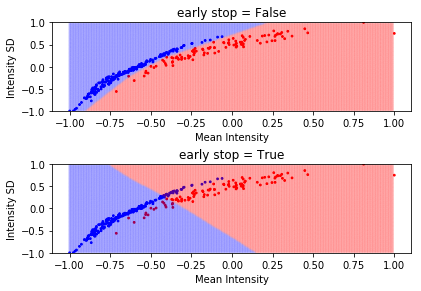

[0.0032051282051281937,
 0.009607686148919159,
 0.14423076923076927,
 0.14811849479583672]

In [7]:
early1 = MLPClassifier(hidden_layer_sizes=(900,5),activation = "relu",epsilon=0.001,max_iter=10000,
                       alpha=0, solver = "adam",early_stopping=False).fit(simpleTrain,trainDigits)
early2 = MLPClassifier(hidden_layer_sizes=(900,5),activation = "relu",epsilon=0.001,max_iter=10000,
                       alpha=0, solver = "adam",early_stopping=True).fit(simpleTrain,trainDigits)
plot(grid1=2,grid2=1,plotNum=2,fileName='test',plotType=1,
     model=[early1,early2],
     subtitle=('early stop = False','early stop = True'),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')
[1-early1.score(simpleTrain,trainDigits), 1-early1.score(simpleTest,testDigits),
1-early2.score(simpleTrain,trainDigits), 1-early2.score(simpleTest,testDigits)]
# [0.0032051282051281937,
#  0.009607686148919159,
#  0.16666666666666663,
#  0.1409127301841473]

# New data set Transfusion

In [8]:
transfusion = np.loadtxt("transfusion_data.txt",delimiter=',',skiprows=1)
np.random.seed(100)
np.random.shuffle(transfusion)
DonateNumTrain = int(transfusion.shape[0]*0.7)
labelDonate = transfusion[0:DonateNumTrain,4]
trainDonate = transfusion[0:DonateNumTrain,0:3]
cv_err_NN([1,2,5],[2,5,10],trainDonate,labelDonate)
# array([[3.88879482e-01, 3.45664678e-01, 2.52341020e-01, 3.49510832e-01,
#         3.11956405e-01, 2.58110251e-01, 2.52341020e-01, 2.52341020e-01,
#         3.65873784e-01],
#        [4.11561169e-01, 3.90082854e-01, 9.42389773e-03, 3.85632669e-01,
#         2.94380943e-01, 3.37018779e-02, 9.42389773e-03, 1.93119616e-02,
#         3.76673731e-01],
#        [2.37295008e+03, 6.29459691e+03, 1.32476530e+04, 2.03101683e+03,
#         4.20796990e+03, 6.64119077e+03, 8.32352877e+02, 2.19262505e+03,
#         3.39608884e+03]])
#total data set 
labelDonate_total = transfusion[:,4]
trainDonate_total = transfusion[:,0:3]
cv_err_NN([1,2,5],[2,5,10],trainDonate_total,labelDonate_total)
# array([[3.45333333e-01, 2.40612613e-01, 2.89945946e-01, 2.37945946e-01,
#         2.39279279e-01, 3.43243243e-01, 3.94666667e-01, 4.49927928e-01,
#         2.27225225e-01],
#        [4.11562060e-01, 1.87824364e-02, 3.07204589e-01, 8.05189189e-03,
#         1.21384035e-02, 4.10537951e-01, 4.73270822e-01, 4.98239564e-01,
#         3.59614835e-02],
#        [4.35391593e+03, 6.74995303e+03, 1.08982668e+04, 5.66308904e+03,
#         1.14907222e+04, 1.54770792e+04, 1.40117908e+03, 5.40724611e+03,
#         8.92803311e+03]])

array([[2.37945946e-01, 3.41945946e-01, 2.47405405e-01, 3.40612613e-01,
        4.03279279e-01, 2.96000000e-01, 3.92594595e-01, 5.10054054e-01,
        2.63279279e-01],
       [8.05189189e-03, 4.09767145e-01, 5.06107898e-02, 4.11114266e-01,
        4.59646237e-01, 3.10851327e-01, 4.71631572e-01, 5.00920972e-01,
        8.65575136e-02],
       [2.88313389e+03, 5.88105392e+03, 1.03673017e+04, 1.83066702e+03,
        2.86538506e+03, 6.14744091e+03, 1.30071402e+03, 2.28220701e+03,
        3.81620884e+03]])

In [9]:
opt([3.88879482e-01, 3.45664678e-01, 2.52341020e-01, 3.49510832e-01,
        3.11956405e-01, 2.58110251e-01, 2.52341020e-01, 2.52341020e-01,
        3.65873784e-01],
       [4.11561169e-01, 3.90082854e-01, 9.42389773e-03, 3.85632669e-01,
        2.94380943e-01, 3.37018779e-02, 9.42389773e-03, 1.93119616e-02,
        3.76673731e-01],
       [2.37295008e+03, 6.29459691e+03, 1.32476530e+04, 2.03101683e+03,
        4.20796990e+03, 6.64119077e+03, 8.32352877e+02, 2.19262505e+03,
        3.39608884e+03])
#70% data as training dataset 
# [2, array([ 2372950.08 ,  6294596.91 , 13247653.   ,  2031016.83 ,
#          4207969.9  ,  6641190.77 ,   832352.877,  2192625.05 ,
#          3396088.84 ])]

# total model 
# [3, array([ 4353915.93,  6749953.03, 10898266.8 ,  5663089.04, 11490722.2 ,
#         15477079.2 ,  1401179.08,  5407246.11,  8928033.11])]

[2, array([ 2372950.08 ,  6294596.91 , 13247653.   ,  2031016.83 ,
         4207969.9  ,  6641190.77 ,   832352.877,  2192625.05 ,
         3396088.84 ])]

In [10]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
TestlabelDonate = transfusion[DonateNumTrain:,4]
testDonate = transfusion[DonateNumTrain:,0:3]


In [16]:
#cart = DecisionTreeClassifier()
#num_trees = 100
# bag1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=100)
# results = model_selection.cross_val_score(bag1, testDonate, TestlabelDonate, cv=30)
# print(results)

def cv_err_bagging(NumbHidLayer,NumbNodes,X,y,learningrate=0.001,earlystop = False):
    err_bar = []
    err_mean = []
    for i in range(0, len(NumbHidLayer)):
        start_time = time.time()
        for j in range(0, len(NumbNodes)):
            NN = MLPClassifier(hidden_layer_sizes=(NumbNodes[j],NumbHidLayer[i]),activation = "relu",
                               max_iter=10000,alpha=0,epsilon=0.001,solver = "adam",
                               learning_rate_init=learningrate,early_stopping=earlystop)
            bagging = BaggingClassifier(base_estimator=NN)
            acc = cross_val_score(bagging, testDonate, TestlabelDonate, cv=30)
            err = 1 - acc
            err_mean.append(err.mean())
            err_bar.append(1.96 * err.std())
    return np.array([err_mean, err_bar])

#cv_err_bagging([1,5],[2,50], testDonate, TestlabelDonate)
#cv_err_bagging([1],[2], testDonate, TestlabelDonate)   #0.21746032 +- 0.21896344   
cv_err_bagging([1,2,5],[2,5,10], trainDonate, labelDonate)
# array([[0.26507937, 0.26507937, 0.23412698, 0.25793651, 0.36210317,
#         0.23829365, 0.25138889, 0.31865079, 0.30734127],
#        [0.37763174, 0.37763174, 0.28819789, 0.3598851 , 0.4751269 ,
#         0.29240436, 0.32973123, 0.47098025, 0.35895287]])

array([[0.26507937, 0.26507937, 0.23412698, 0.25793651, 0.36210317,
        0.23829365, 0.25138889, 0.31865079, 0.30734127],
       [0.37763174, 0.37763174, 0.28819789, 0.3598851 , 0.4751269 ,
        0.29240436, 0.32973123, 0.47098025, 0.35895287]])

In [13]:
cv_err_bagging([1,2,5],[2,5,10], testDonate, TestlabelDonate)
# array([[0.20079365, 0.25496032, 0.24126984, 0.27757937, 0.22162698,
#         0.26984127, 0.26031746, 0.29503968, 0.32222222],
#        [0.10342982, 0.33157539, 0.31217485, 0.37102303, 0.22565644,
#         0.4084037 , 0.32594272, 0.40137045, 0.46735385]])

array([[0.20079365, 0.25496032, 0.24126984, 0.27757937, 0.22162698,
        0.26984127, 0.26031746, 0.29503968, 0.32222222],
       [0.10342982, 0.33157539, 0.31217485, 0.37102303, 0.22565644,
        0.4084037 , 0.32594272, 0.40137045, 0.46735385]])

In [18]:
cv_err_NN([1,2,5],[2,5,10], trainDonate, labelDonate,cv=30)

array([[3.48494866e-01, 2.93741601e-01, 2.52341020e-01, 4.52341020e-01,
        3.50489168e-01, 4.55351287e-01, 3.64164382e-01, 3.69502231e-01,
        3.63879482e-01],
       [3.75119293e-01, 2.90933045e-01, 9.42389773e-03, 4.76432057e-01,
        3.87091810e-01, 4.65804073e-01, 3.68964300e-01, 3.75961033e-01,
        3.84037095e-01],
       [3.80364633e+03, 6.85428238e+03, 1.19001322e+04, 1.89624286e+03,
        4.21549892e+03, 5.92808867e+03, 8.91808033e+02, 2.86086202e+03,
        4.05620408e+03]])

[2, array([ 3803646.33 ,  6854282.38 , 11900132.2  ,  1896242.86 ,
         4215498.92 ,  5928088.67 ,   891808.033,  2860862.02 ,
         4056204.08 ])]